In [32]:
import os
import pandas as pd
from darts import TimeSeries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from src.metrics import compare_series_metrics

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from src.custom_plots import aggregate_median_metrics, plot_bar_for_medians_by_target, plot_boxplots_for_metrics_by_target, process_results_parquet

## Lendo o arquivo em parquet

In [4]:
folder_path = os.path.join(os.curdir, "data", "results")

In [5]:
df = process_results_parquet(folder_path)

In [6]:
df_metrics = compare_series_metrics(df)

In [7]:
df_metrics

,Time_Index,Model,Actuals,Preds,ElapsedTime,target,Activity,MAE,RMSE,MSE
0,"[2019-12-16T12:27:55.000000000, 2019-12-16T12:...",FFT,"[-93.0, -93.0, -93.0, -93.0, -90.0, -90.0, -84...","[-98.30817669188203, -98.78698643695394, -99.0...",1.172526,RSRP,driving_down,8.590408,11.576120,134.006563
1,"[2019-12-16T12:27:55.000000000, 2019-12-16T12:...",FFT,"[-11.000000000000002, -11.000000000000002, -8....","[-10.669603889585131, -10.86646878732797, -10....",1.170602,RSRQ,driving_down,2.788526,4.472419,20.002534
2,"[2019-12-16T12:27:55.000000000, 2019-12-16T12:...",FFT,"[17.999999999999996, 17.999999999999996, 10.99...","[6.005270809978214, 4.605022396470032, 5.29020...",1.171034,SNR,driving_down,7.070391,9.797115,95.983468
3,"[2019-12-16T12:27:55.000000000, 2019-12-16T12:...",FFT,"[13.999999999999998, 13.999999999999998, 13.99...","[13.083797157360092, 12.84112582691527, 12.621...",1.172136,CQI,driving_down,2.243964,3.115945,9.709116
4,"[2019-12-16T12:27:55.000000000, 2019-12-16T12:...",FFT,"[-81.0, -83.0, -80.66666666666667, -78.3333333...","[-86.28881102706775, -88.08251492830297, -89.3...",1.169756,RSSI,driving_down,5.957694,9.307856,86.636188
...,...,...,...,...,...,...,...,...,...,...
3703,"[2019-11-26T13:21:33.000000000, 2019-11-26T13:...",Theta,"[-100.0, -103.0, -103.0, -104.0, -104.0, -104....","[-95.0, -95.0, -95.0, -95.0, -95.0, -95.0, -95...",0.635403,RSRP,driving_strm,5.139044,7.107433,50.515605
3704,"[2019-11-26T13:21:33.000000000, 2019-11-26T13:...",Theta,"[-8.0, -8.0, -8.0, -11.0, -11.0, -11.5, -12.0,...","[-7.632009691450865, -7.577313474671568, -7.86...",0.749926,RSRQ,driving_strm,2.421371,3.315000,10.989224
3705,"[2019-11-26T13:21:33.000000000, 2019-11-26T13:...",Theta,"[9.000000000000002, 7.999999999999997, 7.99999...","[3.117886909817745, 7.494517372987246, 10.5785...",0.789809,SNR,driving_strm,6.733479,8.883921,78.924053
3706,"[2019-11-26T13:21:33.000000000, 2019-11-26T13:...",Theta,"[8.0, 10.0, 14.0, 11.0, 11.0, 11.0, 11.0, 11.0...","[8.544940773324694, 8.647511289686422, 8.64909...",0.765864,CQI,driving_strm,2.236218,3.017676,9.106368


In [8]:
# TODO: Verificar por que não está salvando dentro da pasta .;data
try:
    metrics_path = os.path.join(
    os.curdir, "data", "last_metrics_univariate.parquet"
)

    # Cria o diretório se não existir
    os.makedirs(os.path.dirname(metrics_path), exist_ok=True)
    # Concatena todos os DataFrames e realiza o processamento
    df_metrics.to_parquet(metrics_path, compression="gzip")
except Exception as e:
    print(f"Não foi possivel salvar: {e}")

Não foi possivel salvar: [Errno 13] Permission denied: './data/last_metrics_univariate.parquet'


In [9]:
df_metrics.columns

Index(['Time_Index', 'Model', 'Actuals', 'Preds', 'ElapsedTime', 'target',
       'Activity', 'MAE', 'RMSE', 'MSE'],
      dtype='object')

In [10]:
df_metrics[["Model", "target", "Activity","MAE", "RMSE", "MSE", "ElapsedTime"]]

,Model,target,Activity,MAE,RMSE,MSE,ElapsedTime
0,FFT,RSRP,driving_down,8.590408,11.576120,134.006563,1.172526
1,FFT,RSRQ,driving_down,2.788526,4.472419,20.002534,1.170602
2,FFT,SNR,driving_down,7.070391,9.797115,95.983468,1.171034
3,FFT,CQI,driving_down,2.243964,3.115945,9.709116,1.172136
4,FFT,RSSI,driving_down,5.957694,9.307856,86.636188,1.169756
...,...,...,...,...,...,...,...
3703,Theta,RSRP,driving_strm,5.139044,7.107433,50.515605,0.635403
3704,Theta,RSRQ,driving_strm,2.421371,3.315000,10.989224,0.749926
3705,Theta,SNR,driving_strm,6.733479,8.883921,78.924053,0.789809
3706,Theta,CQI,driving_strm,2.236218,3.017676,9.106368,0.765864


In [12]:
agg_data = aggregate_median_metrics(df_metrics)
agg_data

,Model,target,Activity,MAE_Median,RMSE_Median,MSE_Median
0,AutoARIMA,CQI,driving_down,2.398447,3.724079,13.868766
1,AutoARIMA,CQI,driving_strm,2.190102,3.509033,12.313567
2,AutoARIMA,CQI,static_down,1.961056,3.072910,9.442774
3,AutoARIMA,CQI,static_strm,1.867865,3.671542,13.480236
4,AutoARIMA,RSRP,driving_down,3.872495,6.884006,47.398690
...,...,...,...,...,...,...
175,Theta,RSSI,static_strm,1.239372,1.810013,3.277169
176,Theta,SNR,driving_down,4.648094,6.832039,46.676761
177,Theta,SNR,driving_strm,4.821716,7.006719,49.095789
178,Theta,SNR,static_down,3.034527,4.003493,16.027956


## Bar plots das médias.

Paleta de cores:

In [13]:
sns.set_palette("Paired")

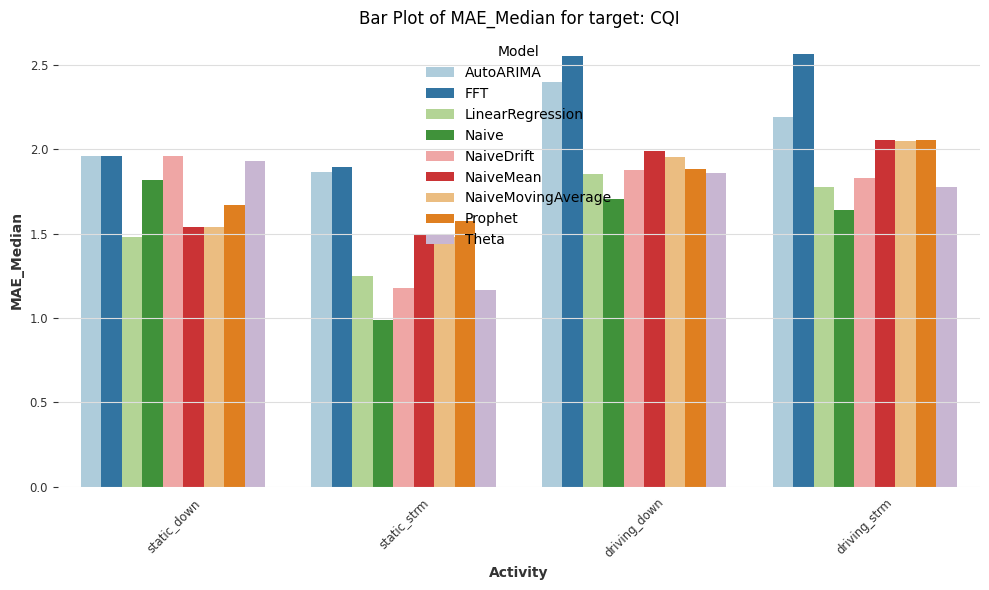

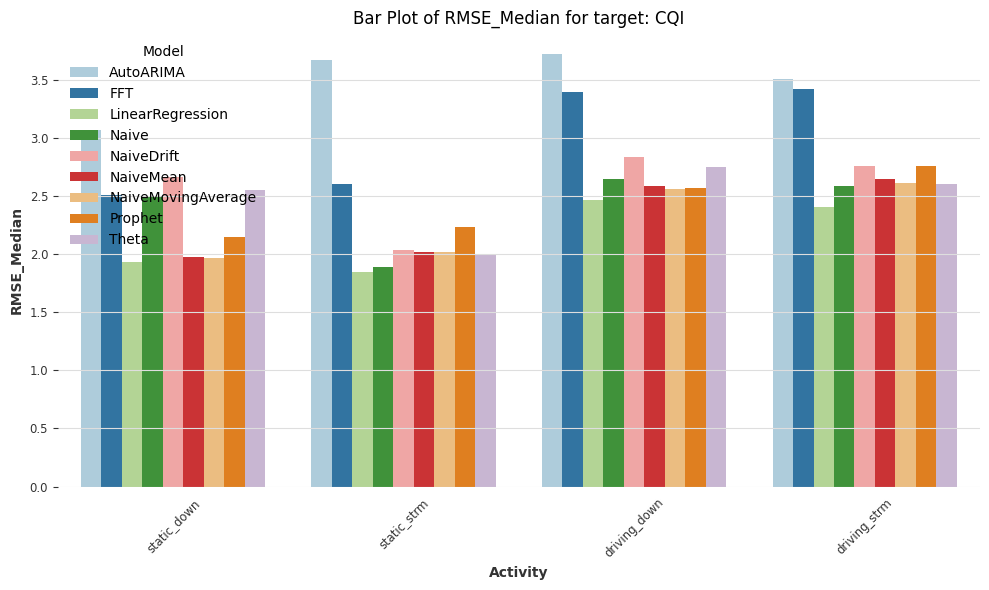

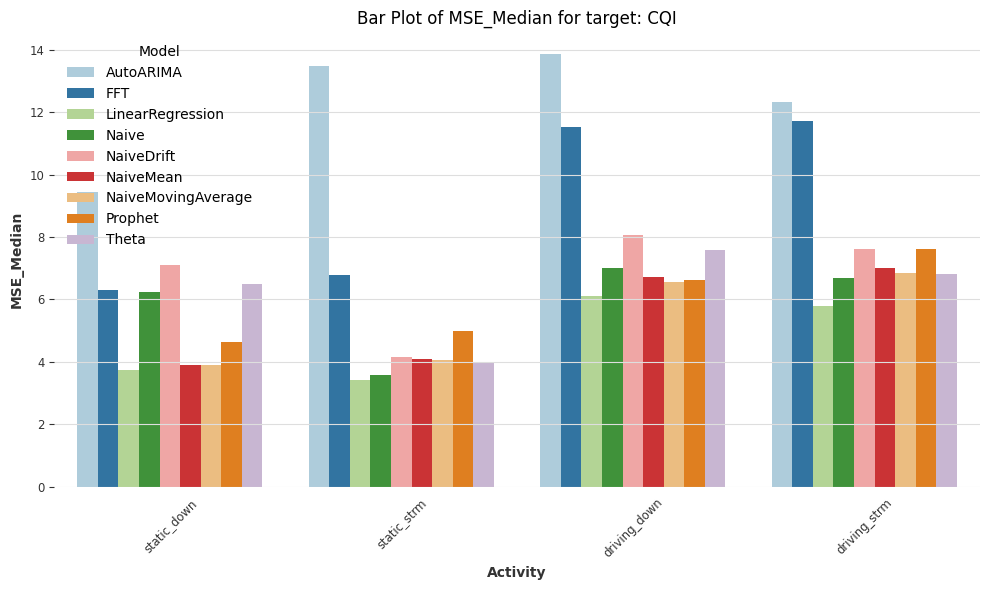

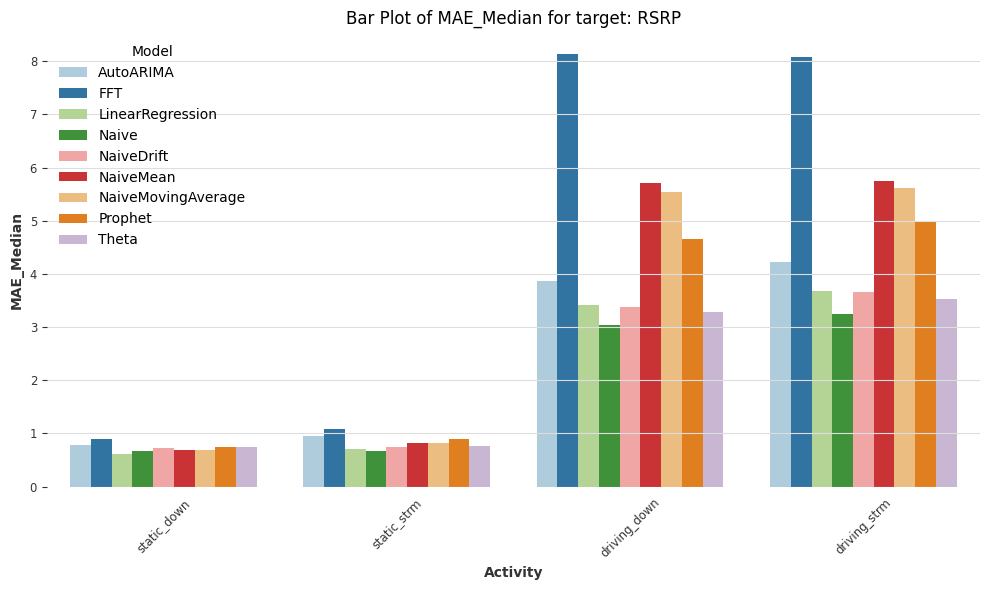

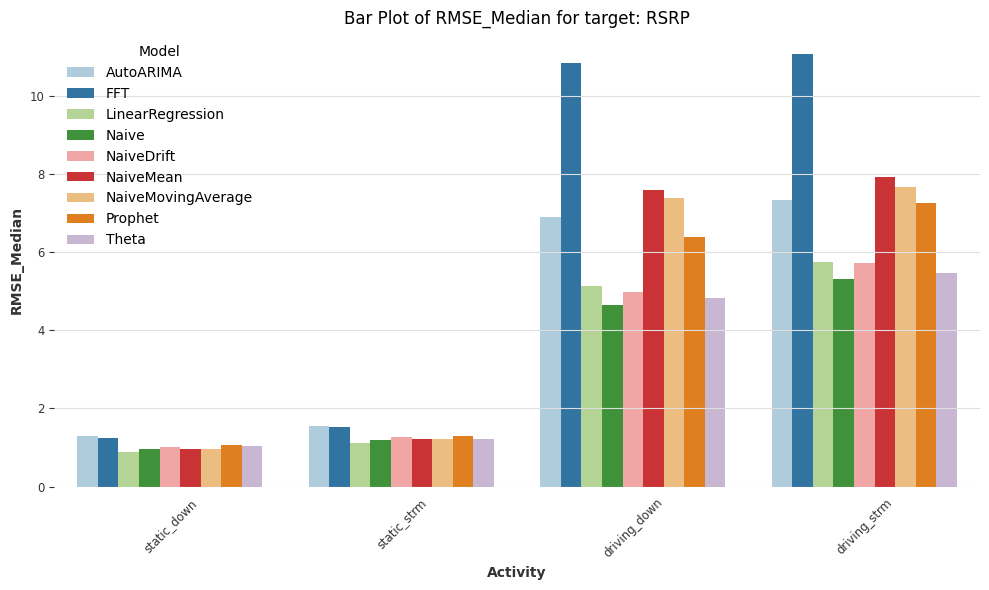

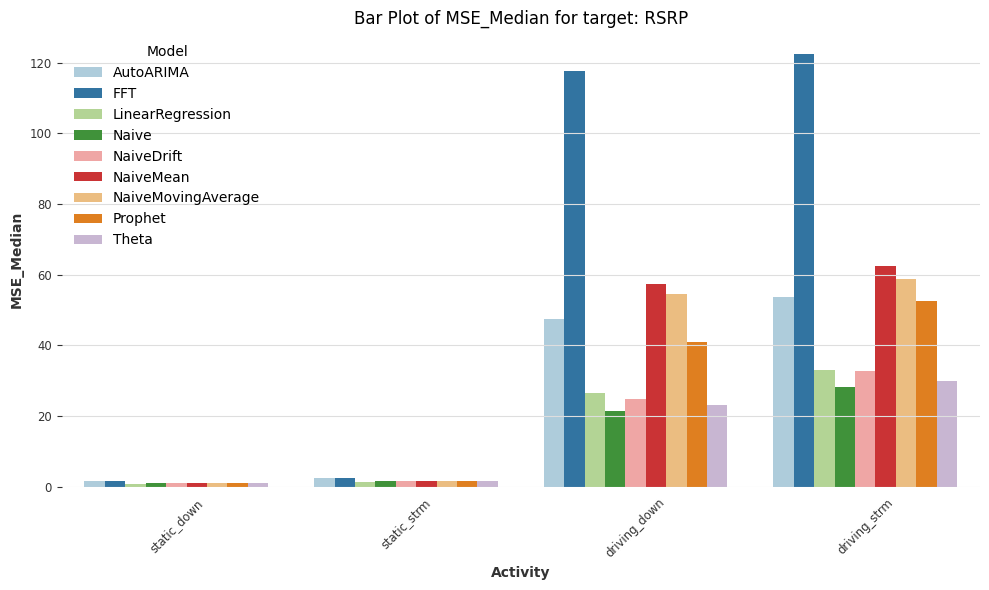

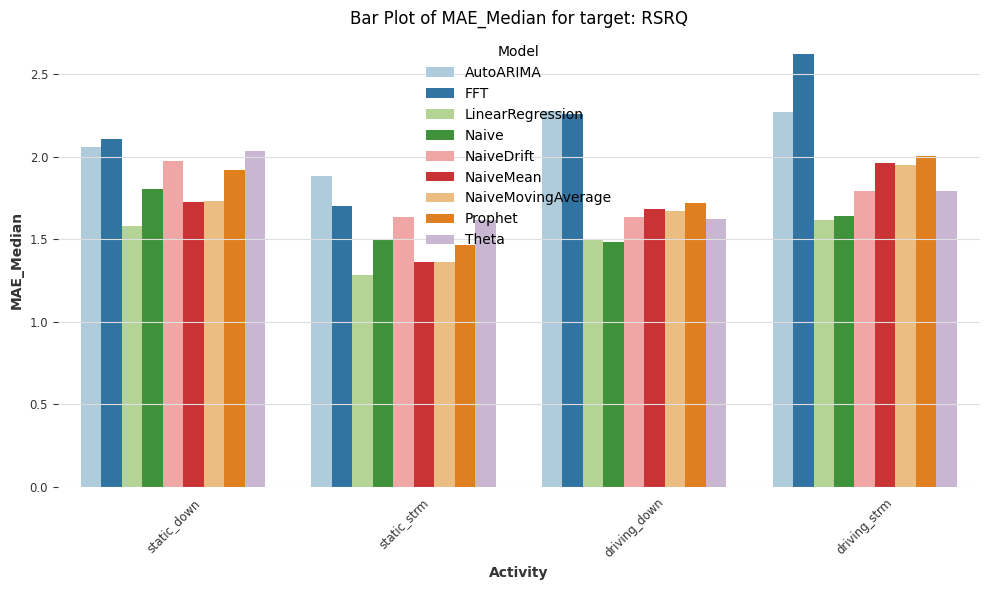

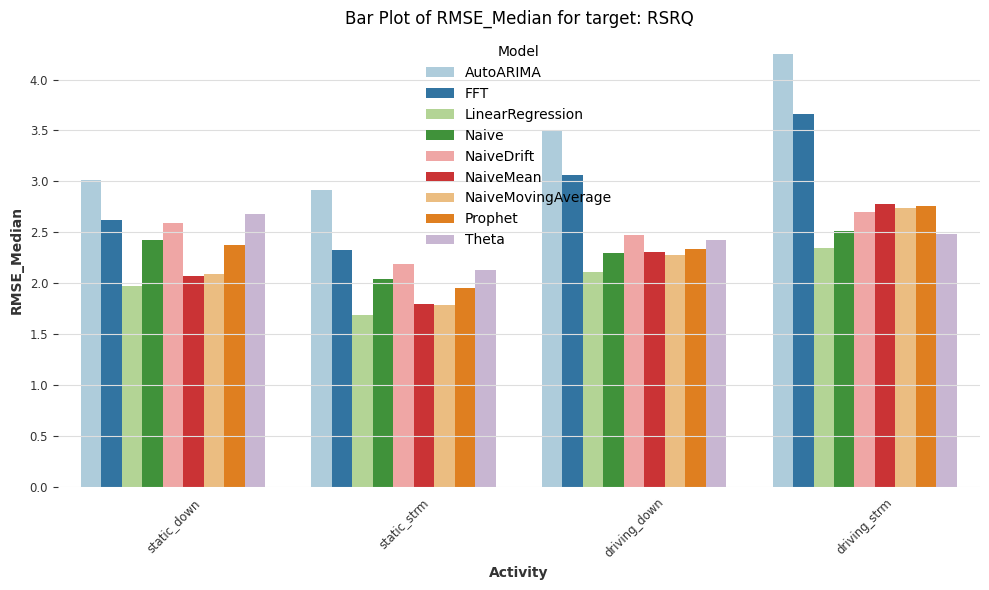

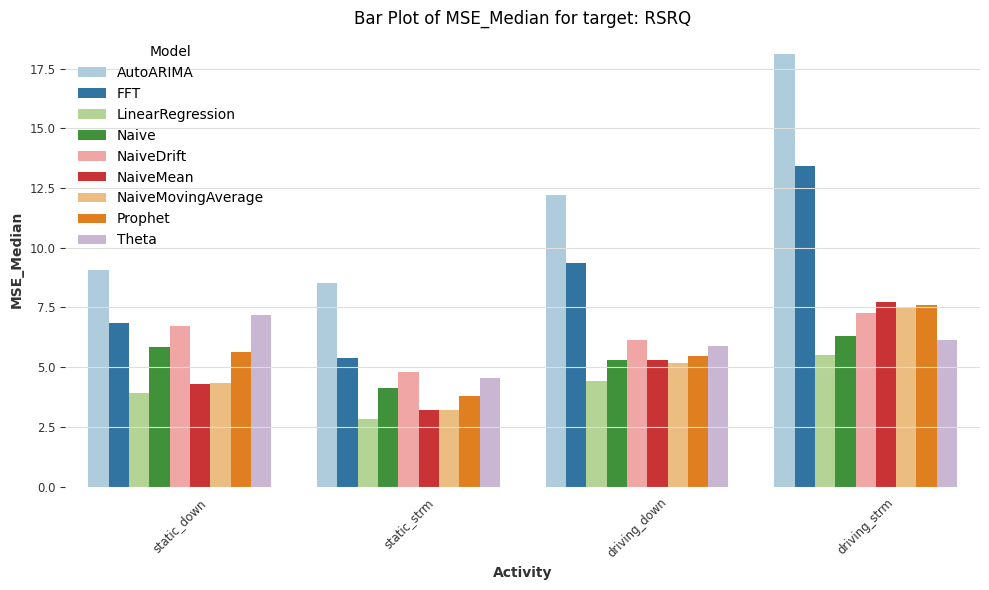

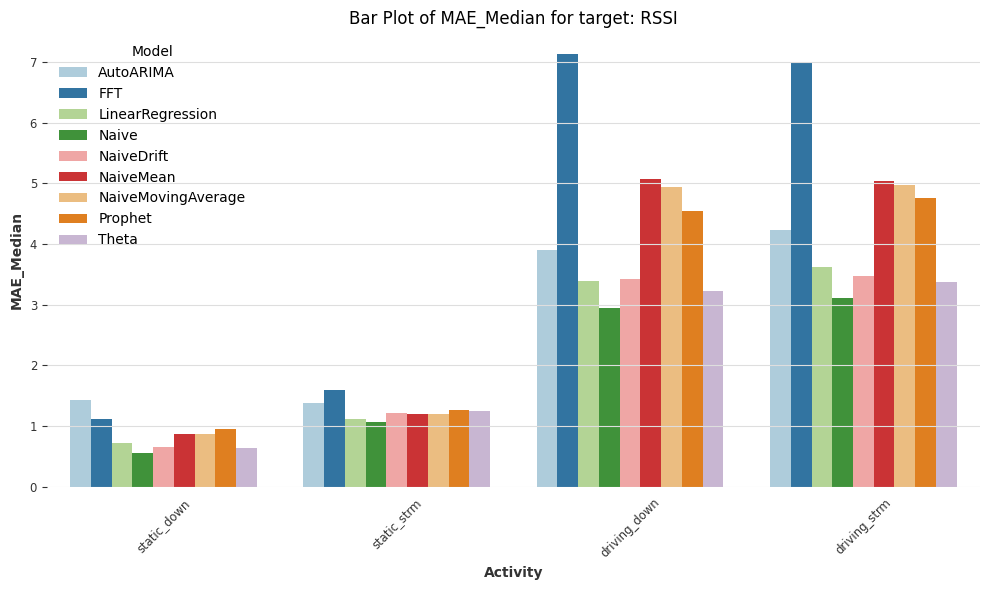

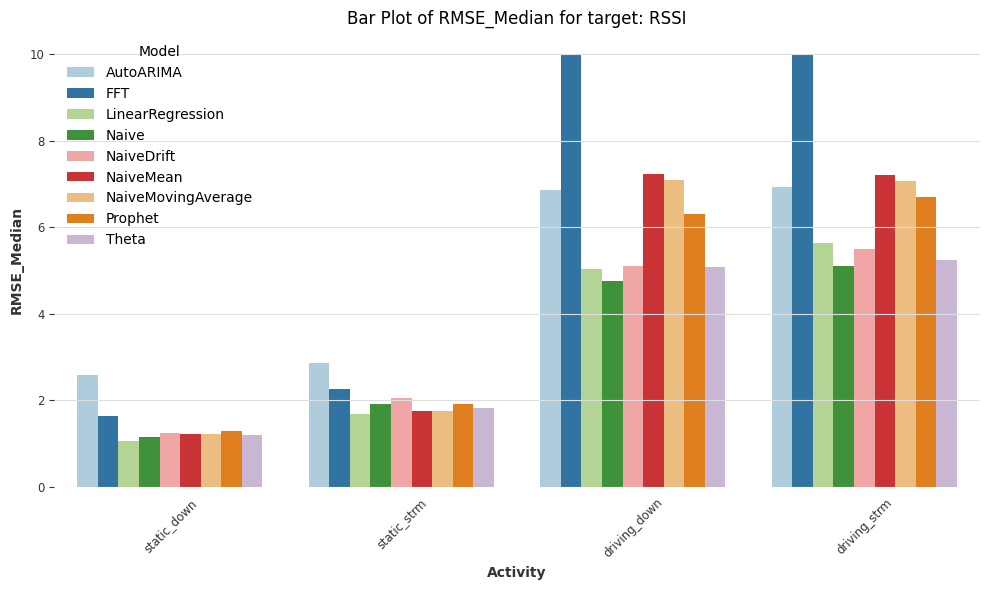

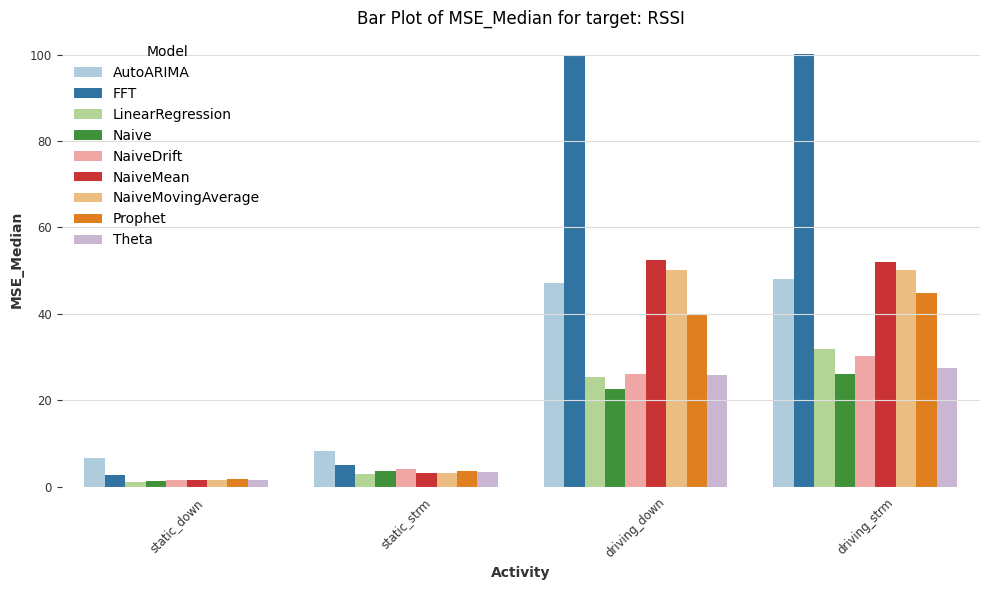

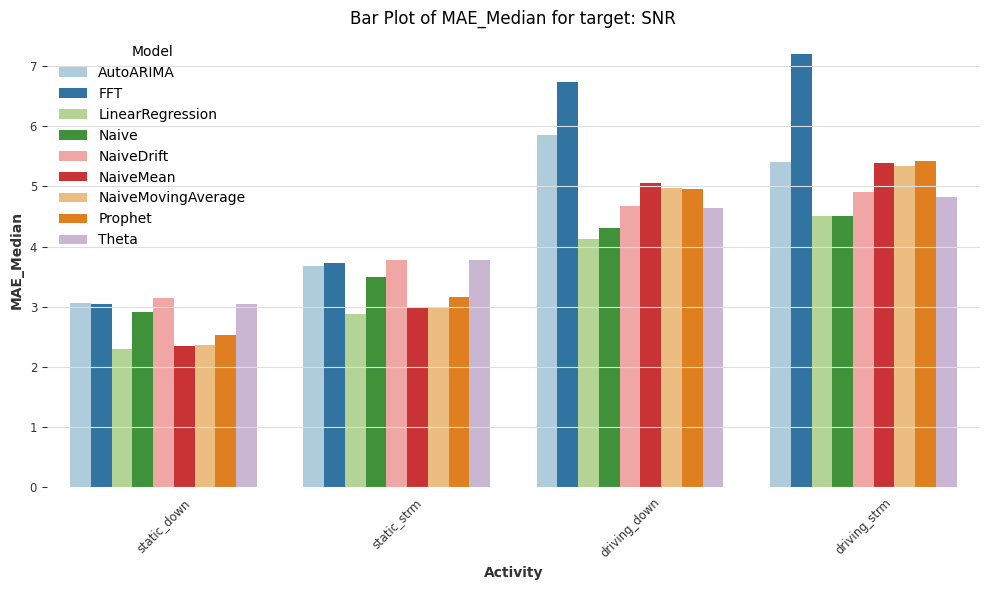

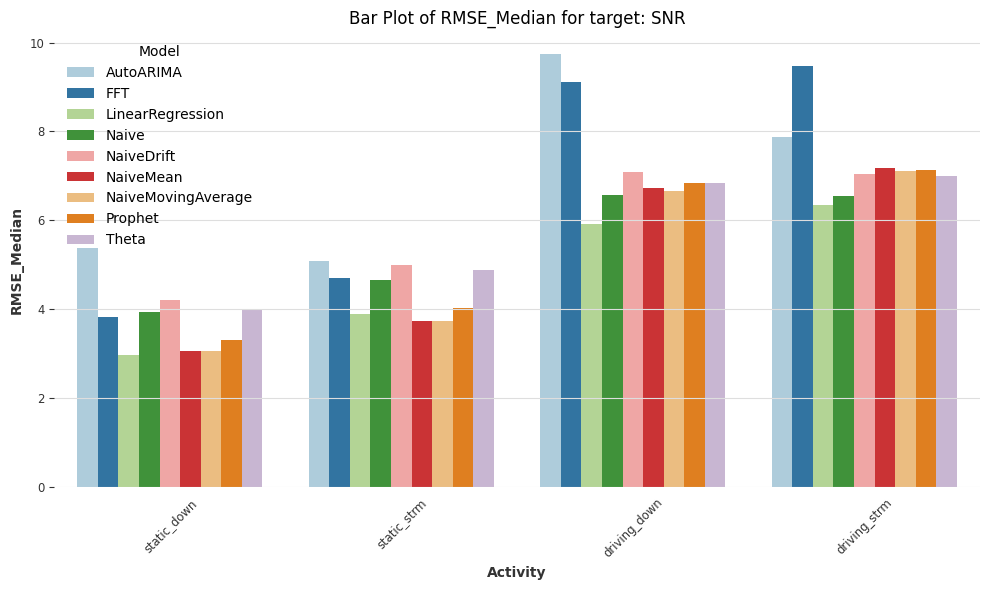

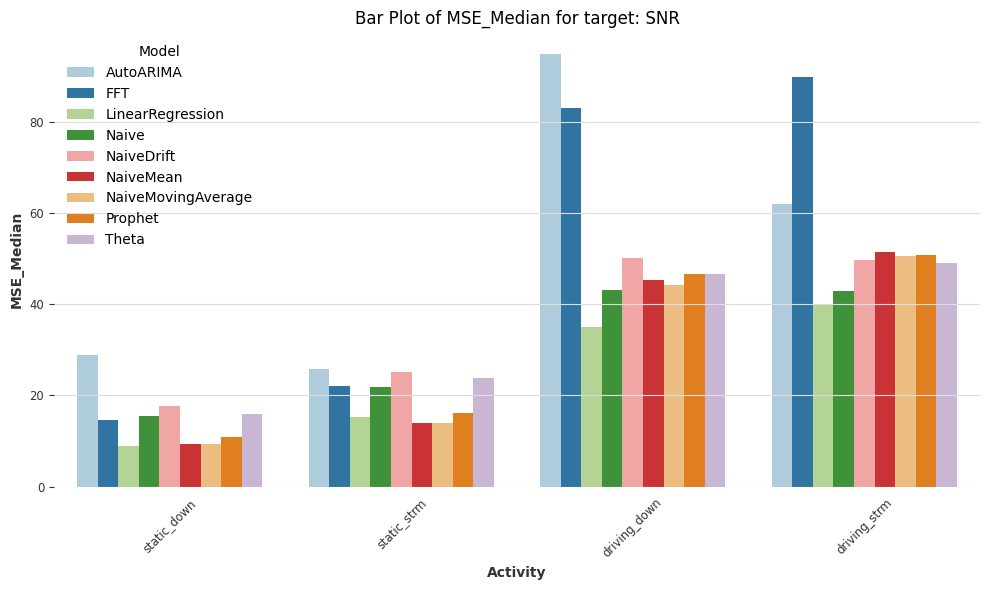

In [15]:
plot_bar_for_medians_by_target(agg_data)

## Boxplot das métricas

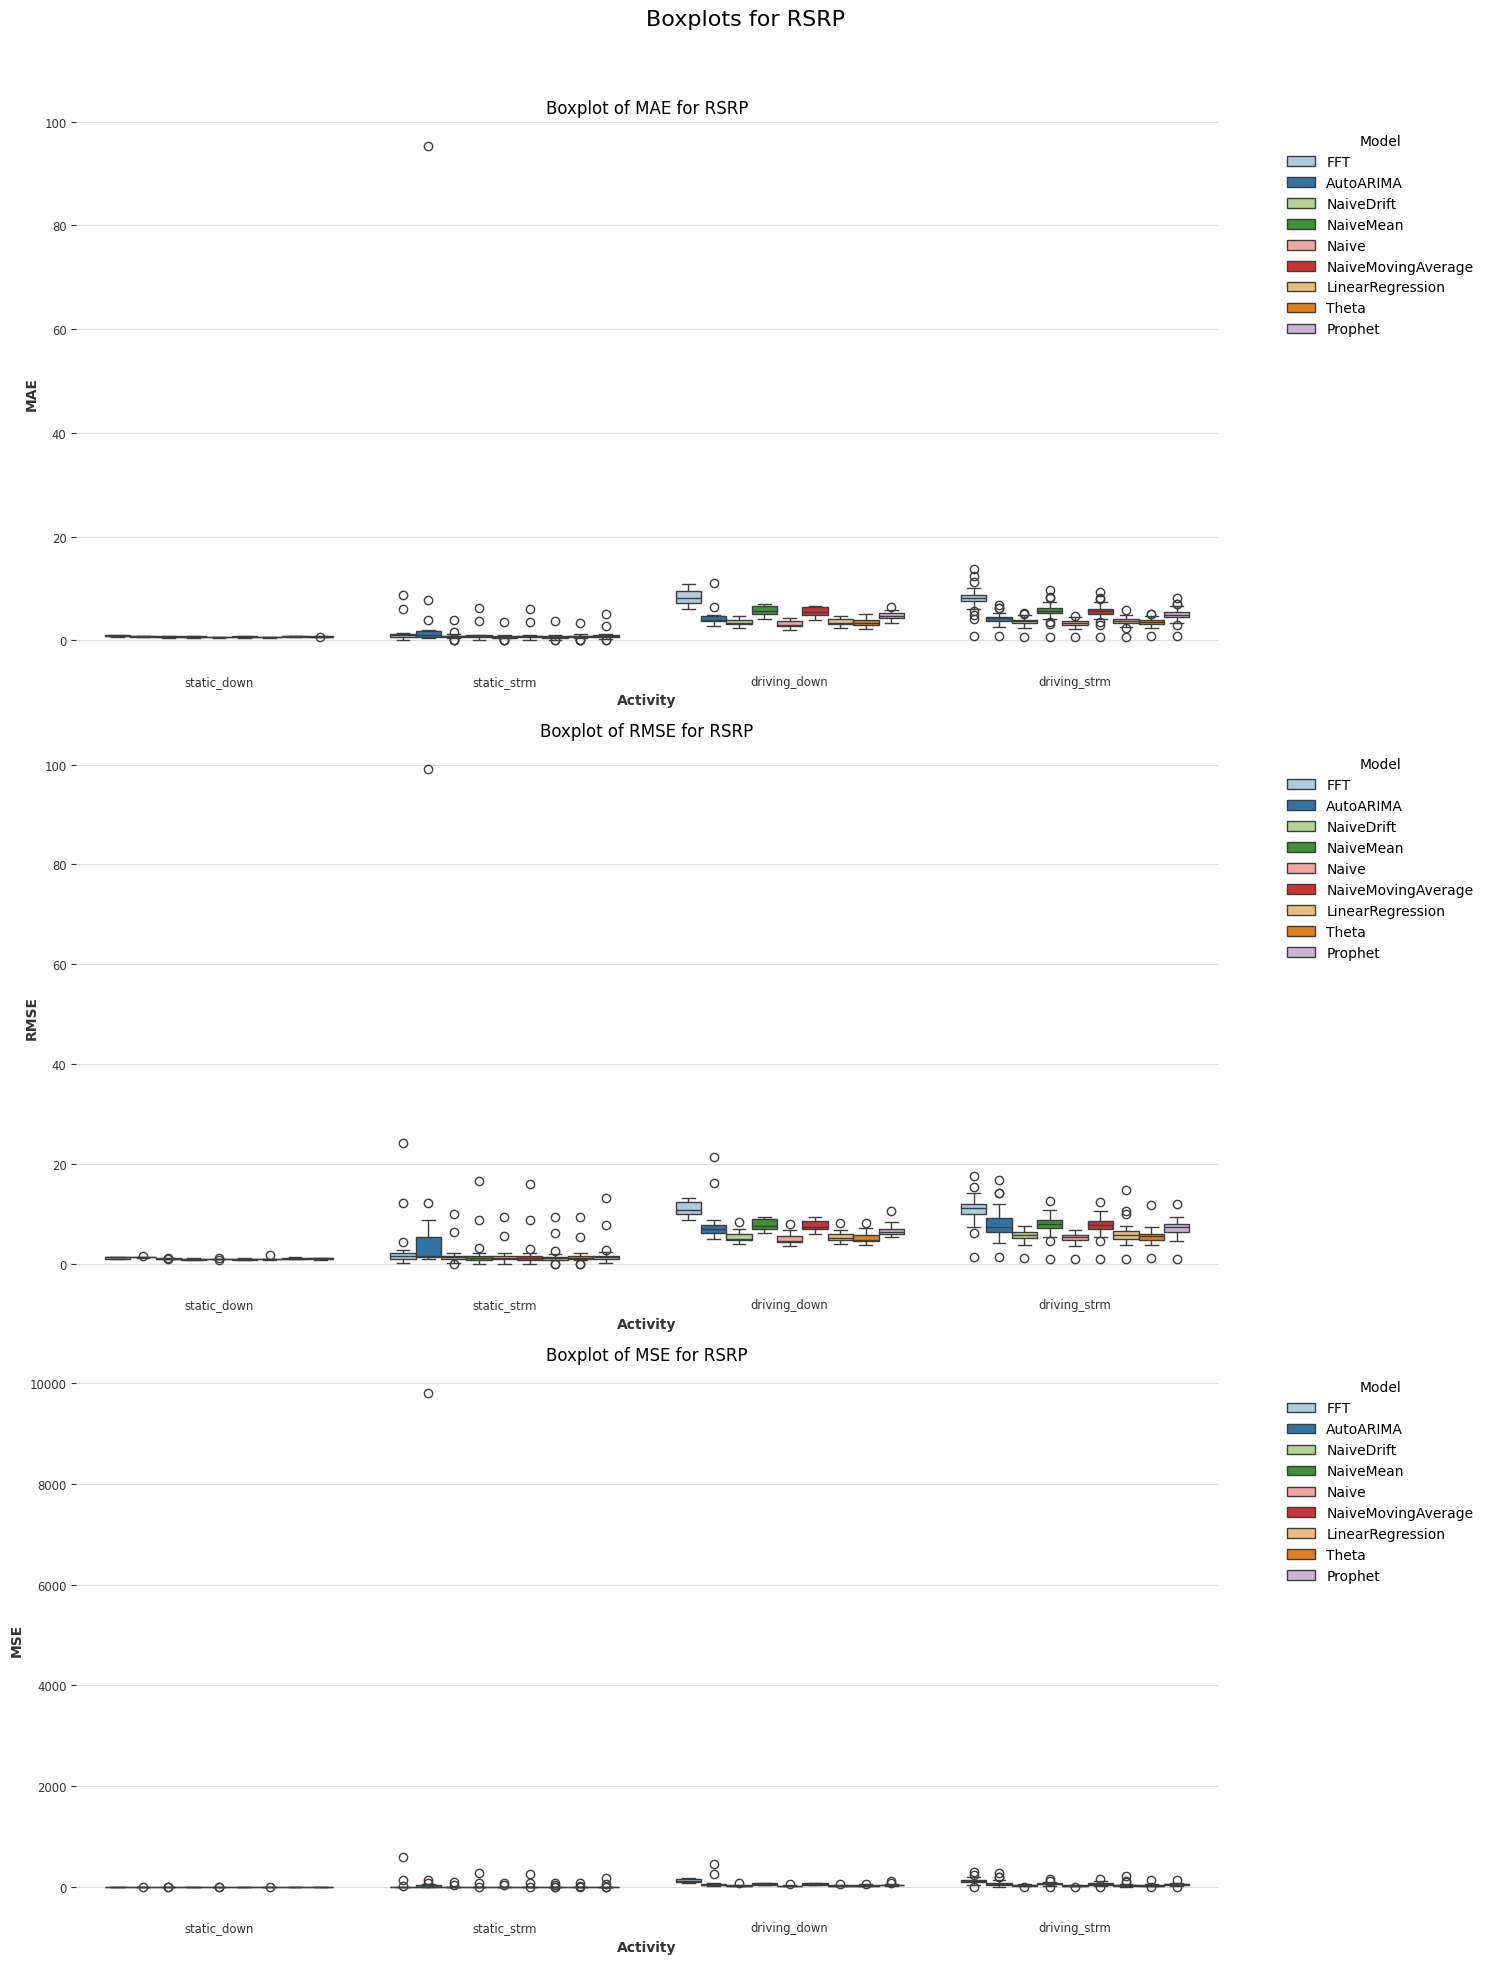

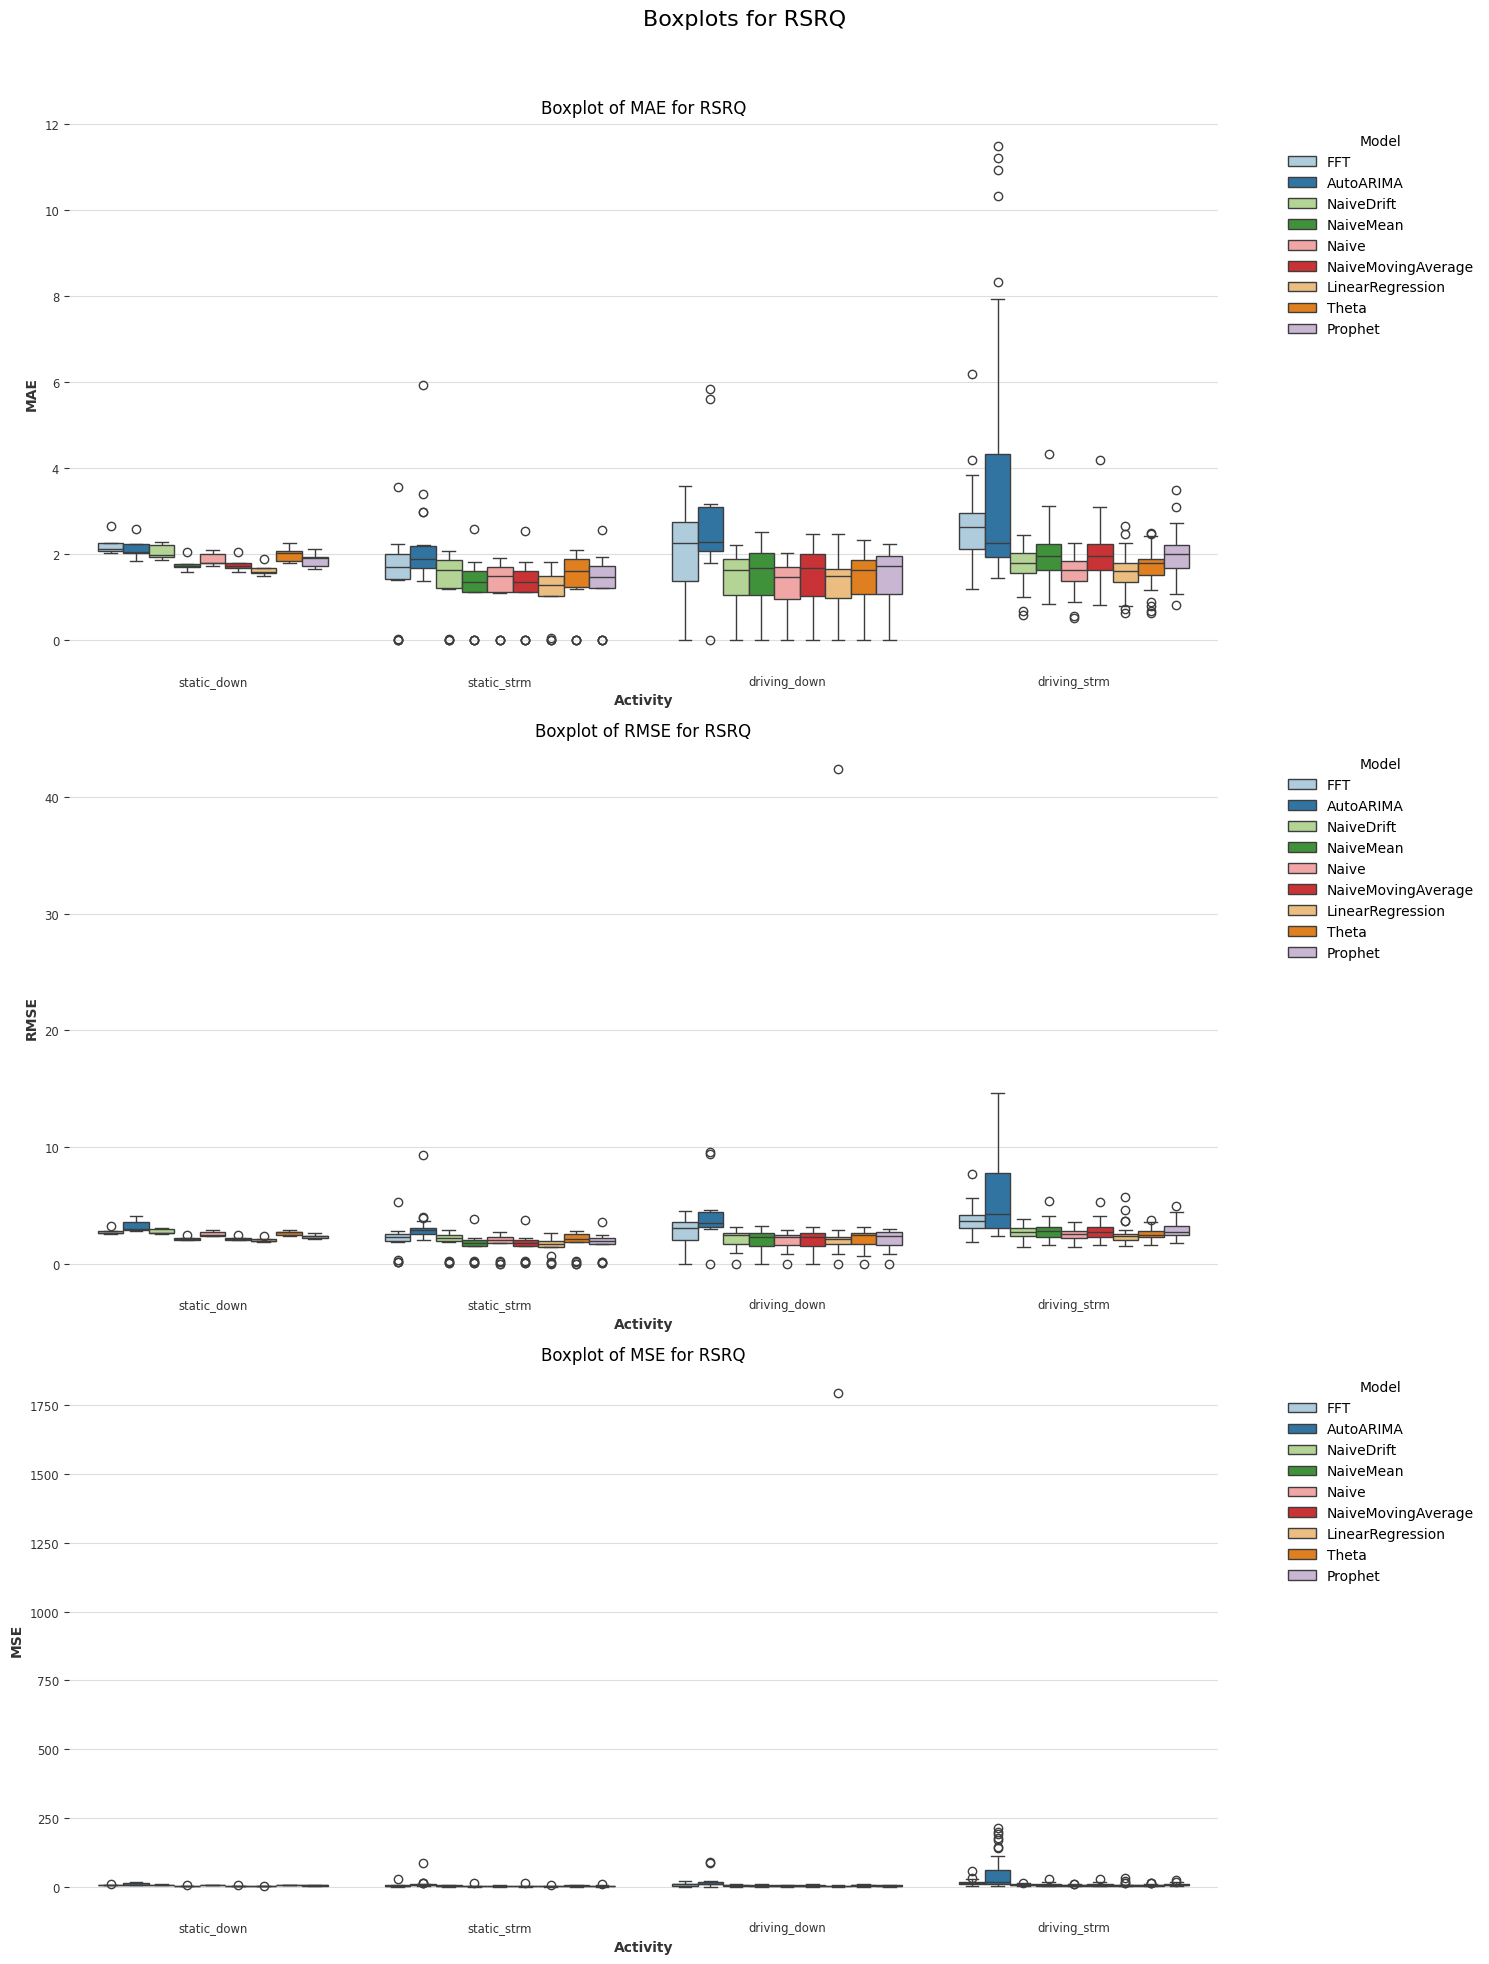

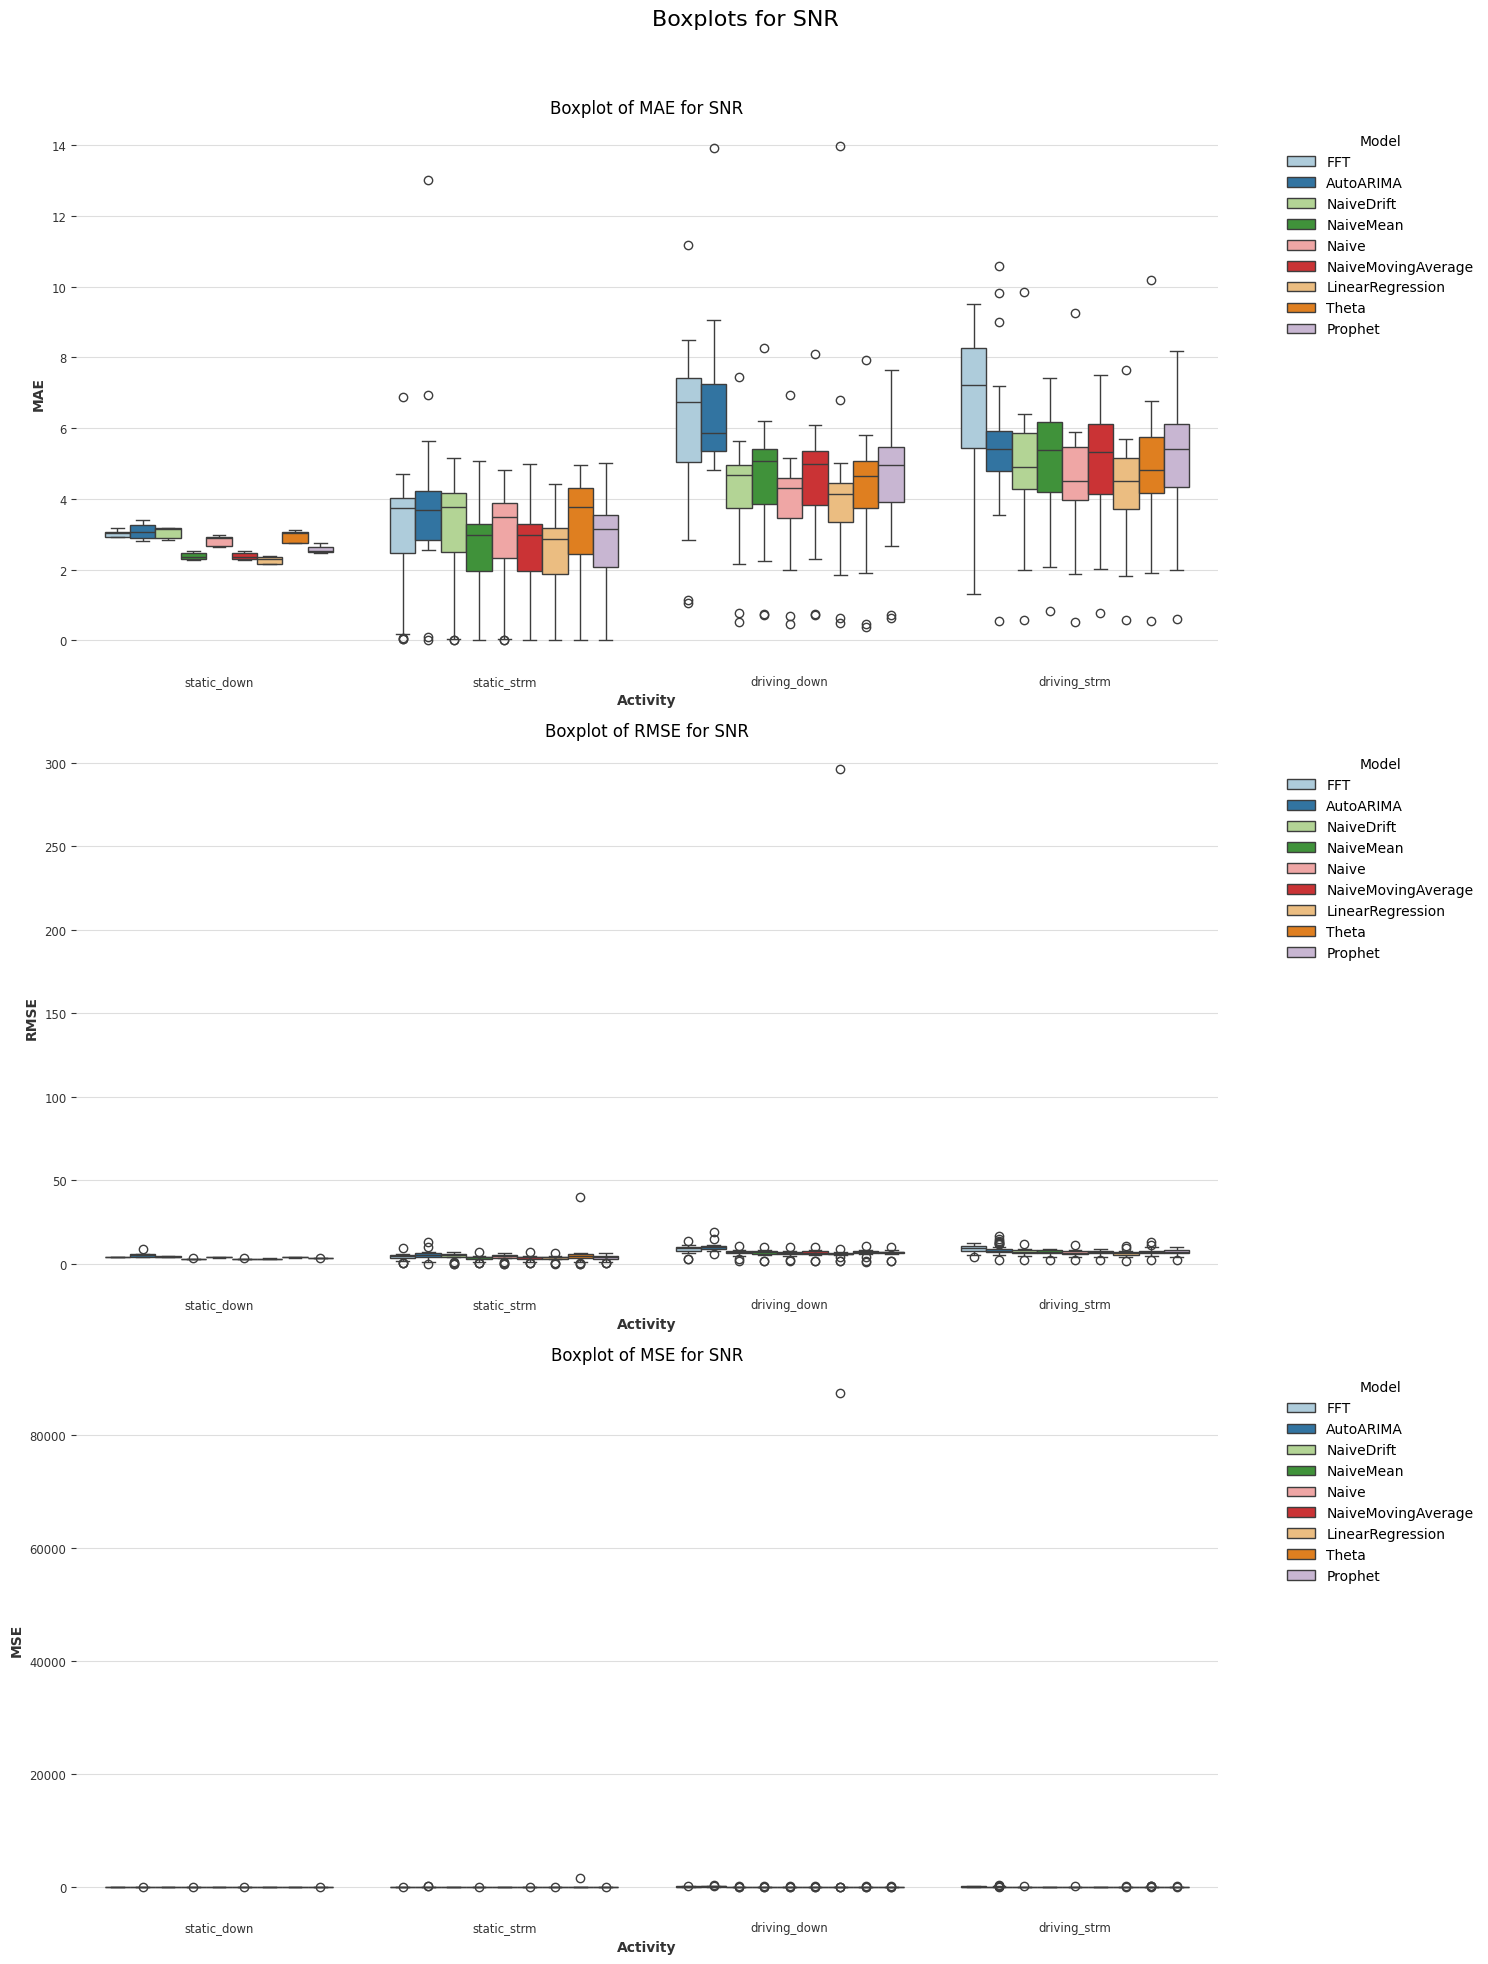

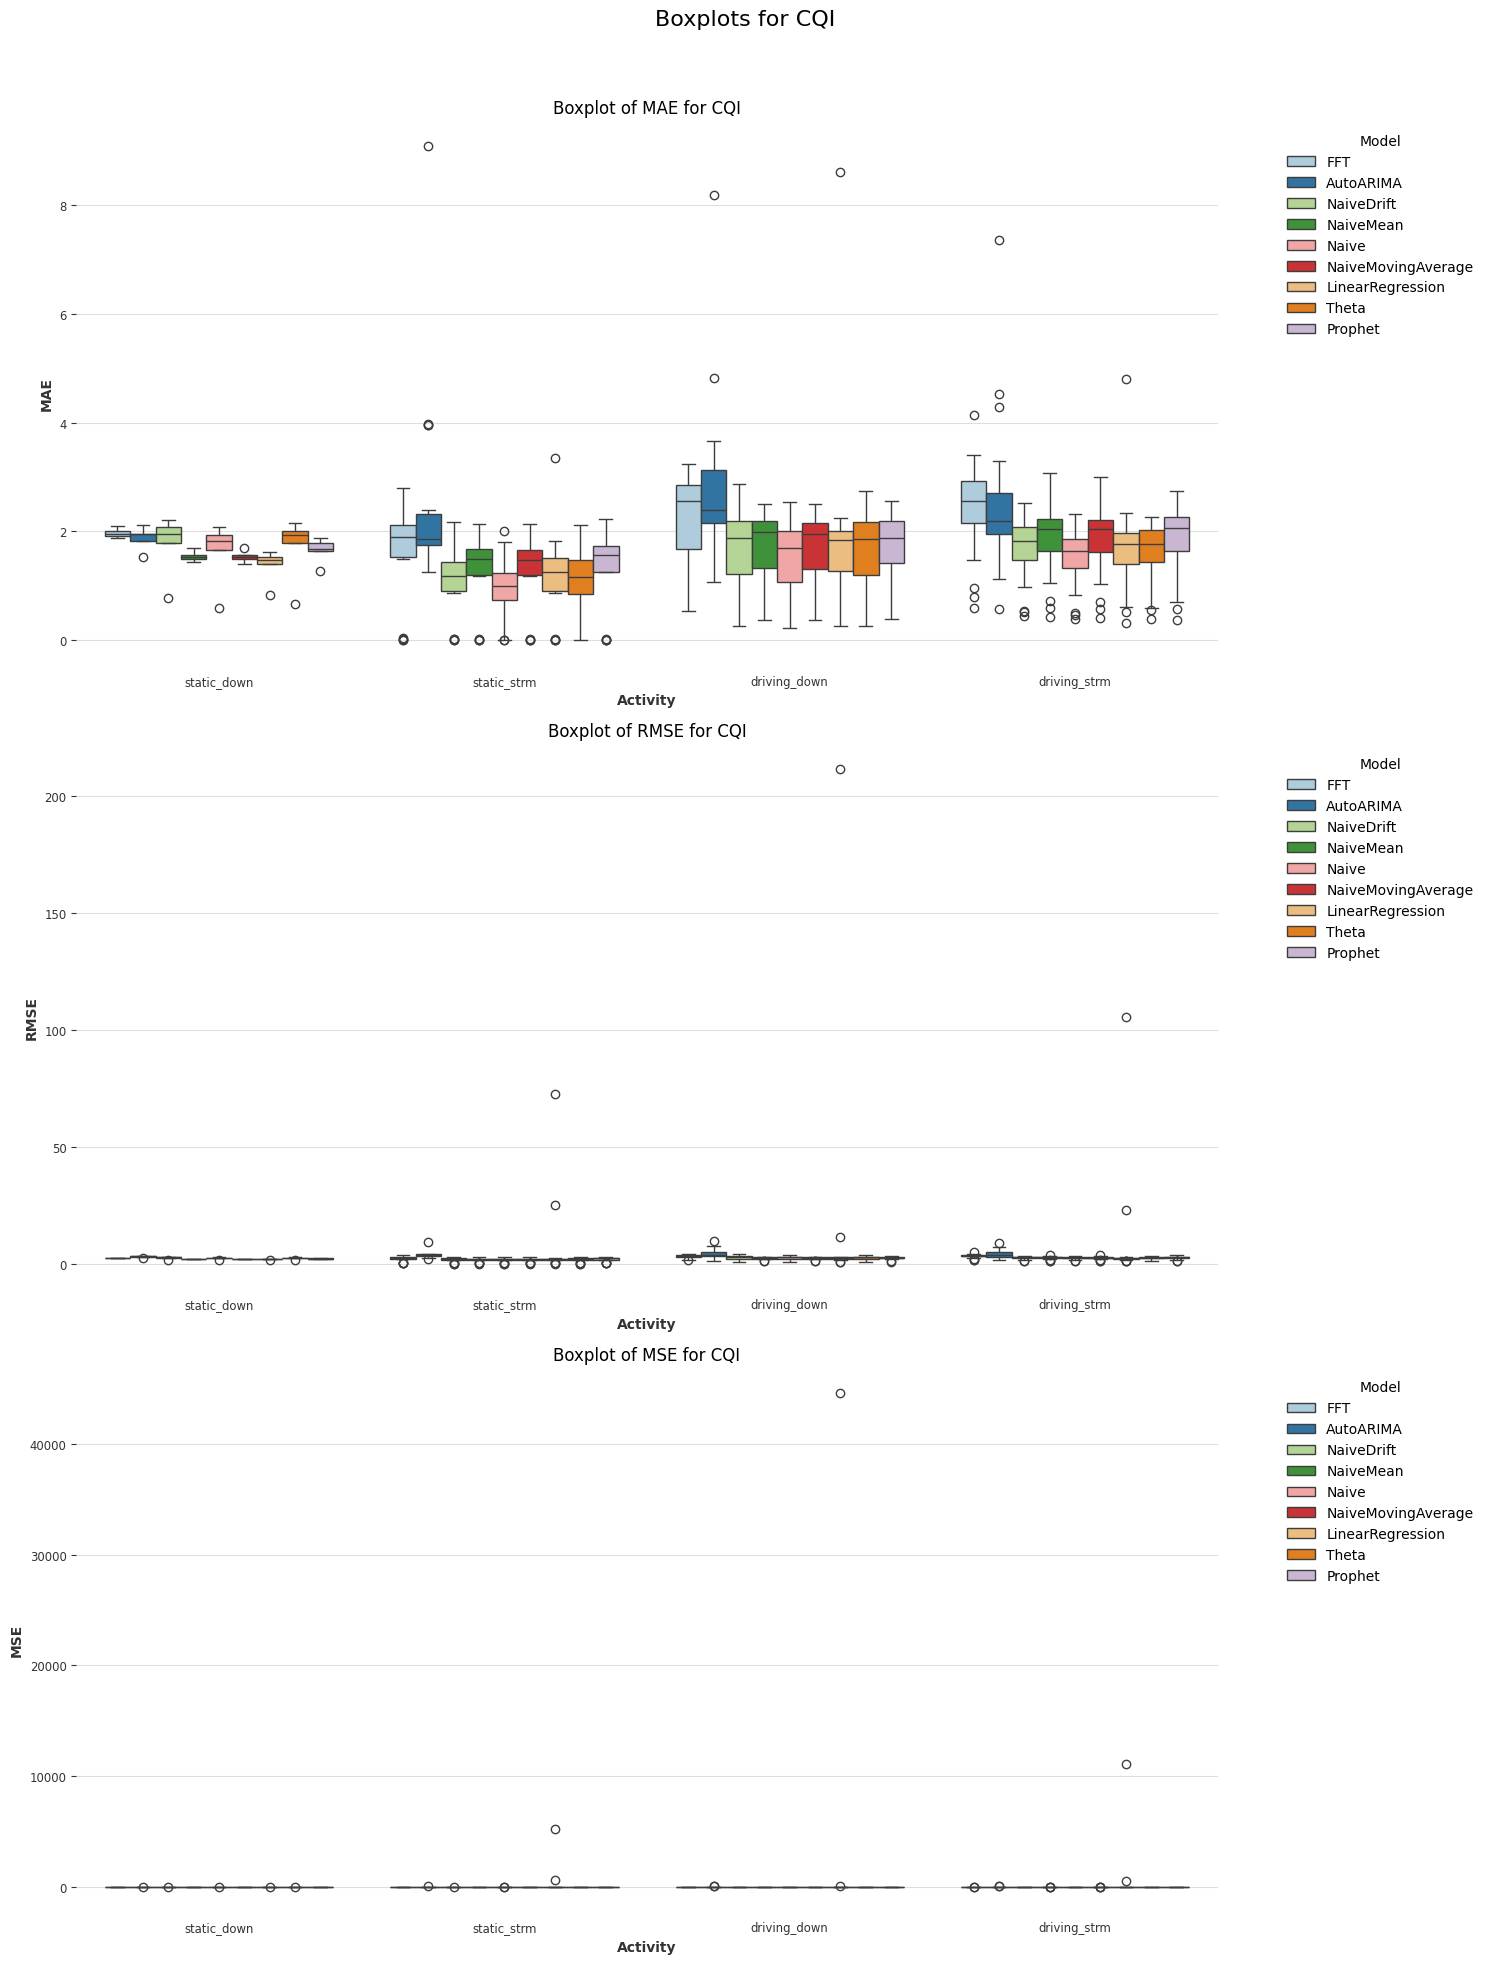

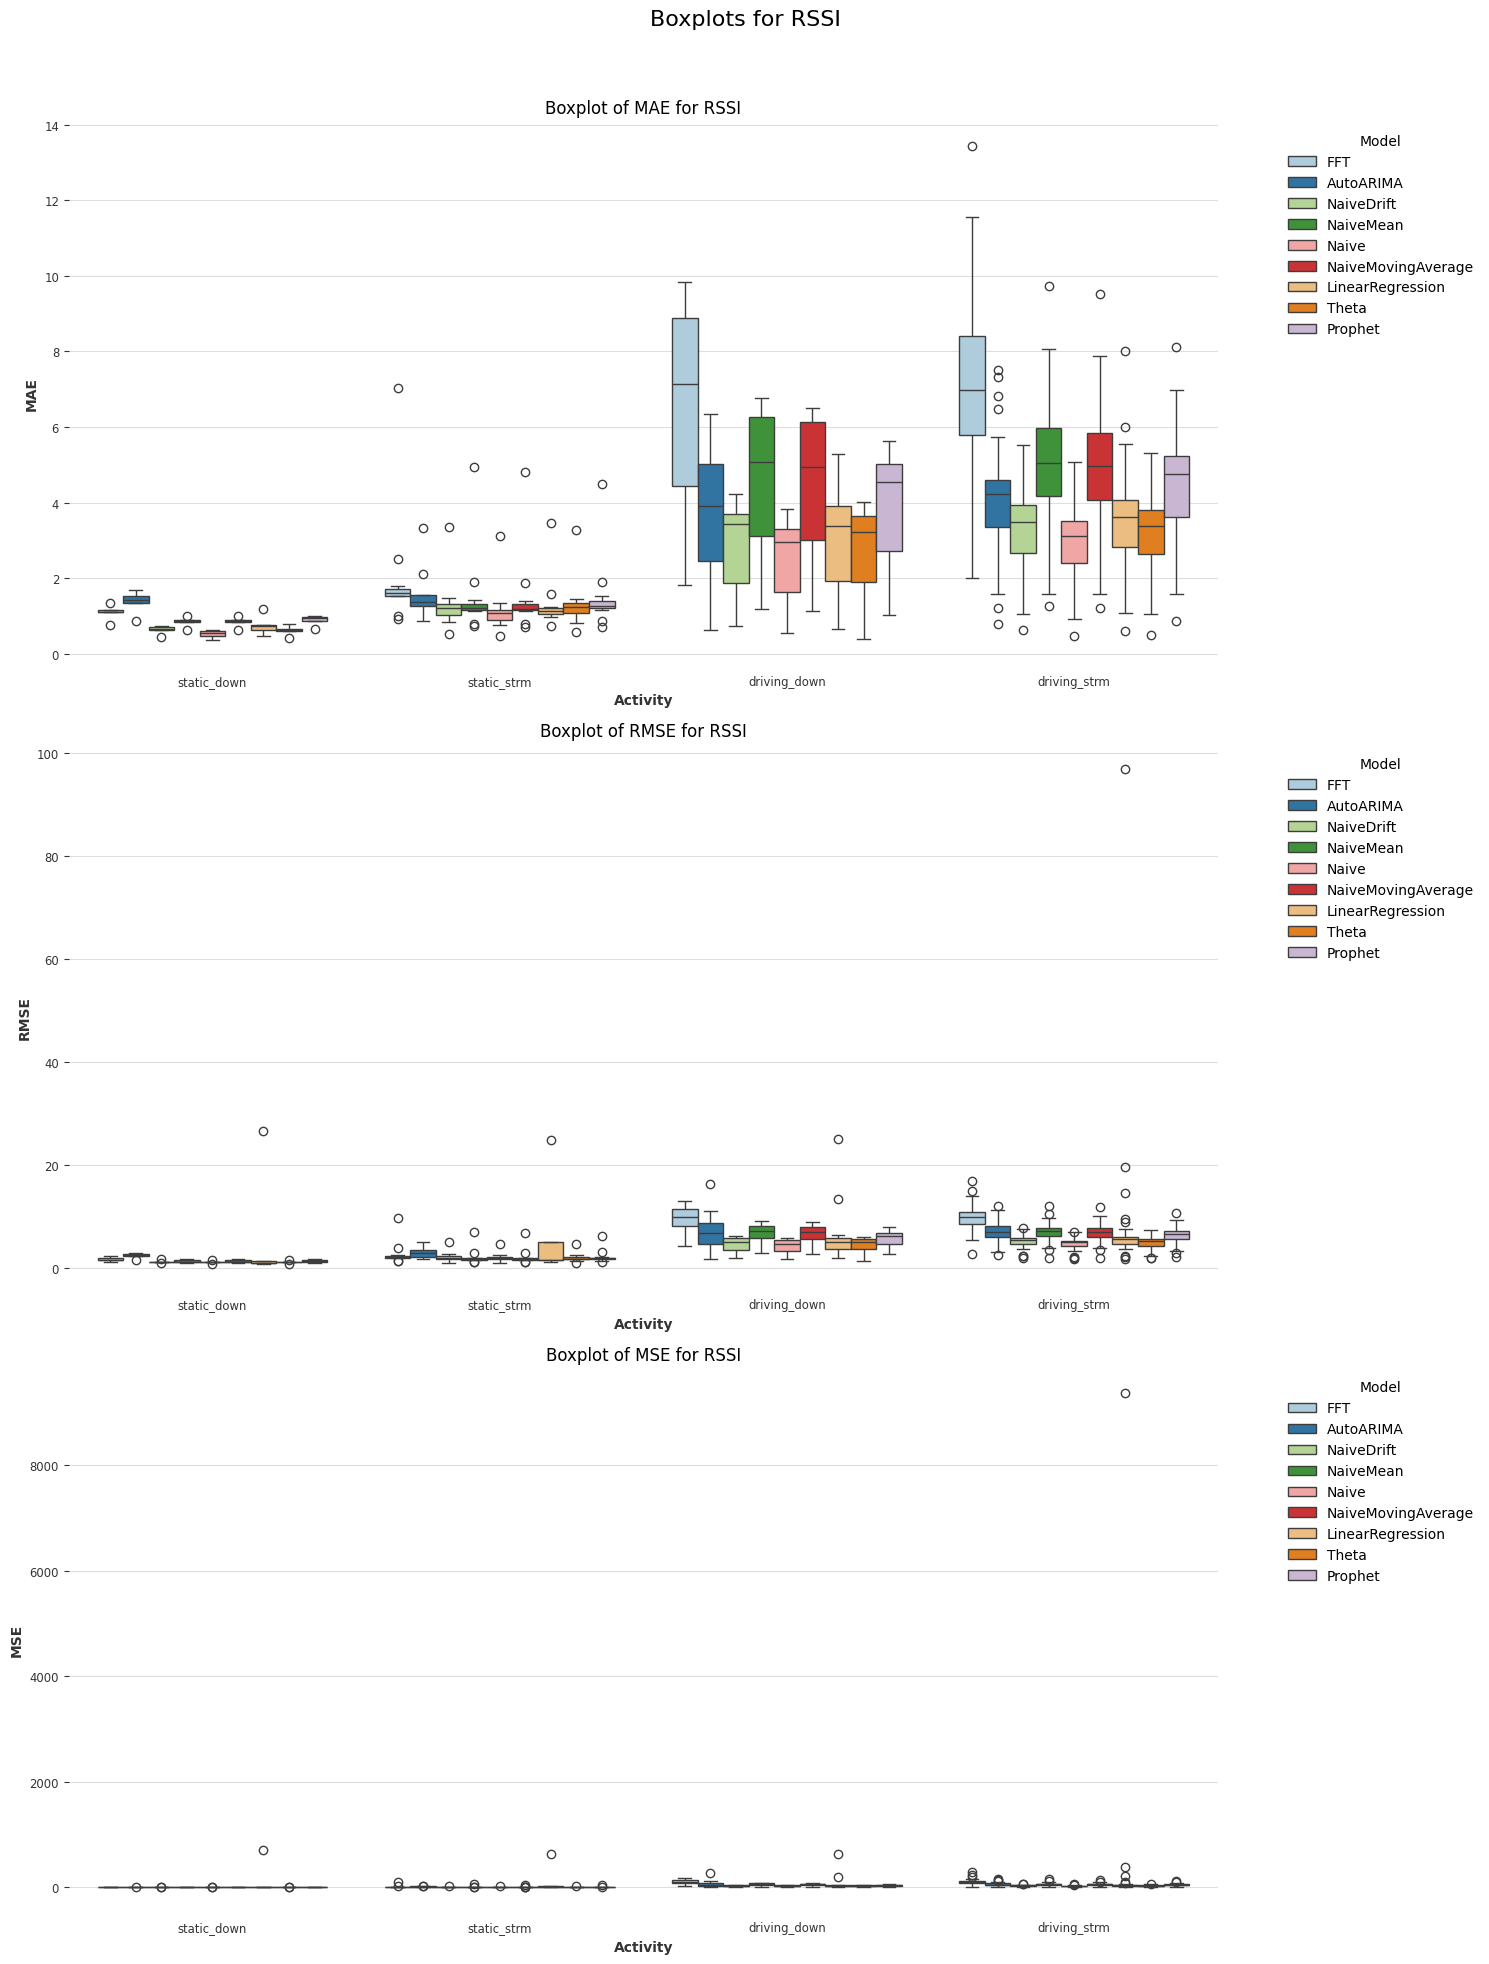

In [16]:
plot_boxplots_for_metrics_by_target(df_metrics)

# Lendo os resultados das métricas geradas por um modelo

In [21]:
def query_lowest_metric(df, metric):
    """
    Realiza uma query no DataFrame que retorna as linhas com o menor valor da métrica especificada para cada combinação de Model, target e Activity.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo as colunas 'Model', 'target', 'Activity' e as métricas.
    metric (str): Nome da métrica a ser avaliada ('MAE', 'RMSE' ou 'MSE').

    Retorna:
    pd.DataFrame: DataFrame contendo as linhas com o menor valor da métrica para cada grupo de Model, target e Activity.
    """
    
    # Verificar se a métrica especificada é válida
    if metric not in ['MAE', 'RMSE', 'MSE']:
        raise ValueError(f"Métrica '{metric}' não é válida. Escolha entre 'MAE', 'RMSE' ou 'MSE'.")

    # Verificar se as colunas necessárias estão presentes no DataFrame
    required_columns = ['Model', 'target', 'Activity', metric]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Coluna {col} está ausente no DataFrame")

    # Obter os índices das linhas com o menor valor da métrica para cada combinação de Model, target e Activity
    idx = df.groupby(['Model', 'target', 'Activity'])[metric].idxmin()

    # Retornar as linhas correspondentes ao menor valor da métrica
    result = df.loc[idx]

    return result

In [23]:
lowest_mae = query_lowest_metric(df_metrics, 'MAE')
lowest_rmse = query_lowest_metric(df_metrics, 'RMSE')
lowest_mse = query_lowest_metric(df_metrics, 'MSE')

In [24]:
lowest_mae

,Time_Index,Model,Actuals,Preds,ElapsedTime,target,Activity,MAE,RMSE,MSE
145,"[2020-02-14T12:59:07.000000000, 2020-02-14T12:...",AutoARIMA,"[14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 14.0, 14....","[14.075388311546599, 13.661517967601764, 13.66...",20.652354,CQI,driving_down,1.068171,1.309548,1.714916
730,"[2019-12-02T09:40:25.000000000, 2019-12-02T09:...",AutoARIMA,"[8.0, 8.0, 8.0, 8.0, 8.0, 13.999999999999998, ...","[6.347234695332148, 3.717407522453008, 1.04052...",16.630062,CQI,driving_strm,0.581342,2.510187,6.301040
1829,"[2019-12-16T13:40:54.000000000, 2019-12-16T13:...",AutoARIMA,"[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11....","[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11....",132.629273,CQI,static_down,1.539037,2.577102,6.641456
1526,"[2019-11-28T09:22:35.000000000, 2019-11-28T09:...",AutoARIMA,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",238.378127,CQI,static_strm,1.253523,2.323637,5.399290
117,"[2020-02-13T13:04:14.000000000, 2020-02-13T13:...",AutoARIMA,"[-99.0, -93.0, -93.0, -92.0, -92.0, -92.0, -90...","[-99.41720703139154, -99.52900129075675, -99.5...",176.826534,RSRP,driving_down,2.673824,7.702151,59.323137
...,...,...,...,...,...,...,...,...,...,...
2786,"[2019-12-23T10:31:25.000000000, 2019-12-23T10:...",Theta,"[-85.0, -85.0, -85.5, -85.99999999999999, -86....","[-85.3750292370542, -85.3750292370542, -85.375...",8.600890,RSSI,static_strm,0.559861,1.033788,1.068719
1389,"[2020-02-27T17:31:05.000000000, 2020-02-27T17:...",Theta,"[-2.0, -2.0, 0.0, 0.0, -1.0, -1.0, -1.0, 1.0, ...","[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....",0.771755,SNR,driving_down,0.371456,1.205527,1.453296
3680,"[2019-12-02T09:40:25.000000000, 2019-12-02T09:...",Theta,"[7.0, 7.0, 10.0, 10.0, 9.0, 9.0, 5.0, 5.0, 5.0...","[7.500000007450581, 7.500000007450581, 7.50000...",0.932346,SNR,driving_strm,0.541031,2.025322,4.101929
1578,"[2020-01-16T10:44:24.000000000, 2020-01-16T10:...",Theta,"[-0.9999999999999993, -0.9999999999999993, -0....","[0.5319570296101408, 0.7834068409076166, -2.07...",5.285993,SNR,static_down,2.757058,3.638770,13.240645


## Um gráfico de comparação entre o resultado actual vs forescat em uma das sliding windows

In [62]:
def plot_actual_vs_preds(result_df: pd.DataFrame, model: str, target: str, activity: str) -> None:
    """
    Plota as séries temporais reais versus as predições para uma combinação específica de Model, target e Activity.

    Args:
        result_df (pd.DataFrame): DataFrame contendo as colunas "Time_Index", "Actuals", "Preds", "Model", "target", "Activity".
        model (str): O modelo a ser filtrado.
        target (str): O alvo a ser filtrado.
        activity (str): A atividade a ser filtrada.
    """
    # Filtra o DataFrame com base nos parâmetros fornecidos
    filtered_df = result_df[(result_df["Model"] == model) & 
                             (result_df["target"] == target) & 
                             (result_df["Activity"] == activity)]
    print(filtered_df[["MAE", "RMSE", "MSE"]])

    # Verifica se a filtragem resultou em algum dado
    if filtered_df.empty:
        raise ValueError("Nenhum dado encontrado para os parâmetros fornecidos.")

    # Obtém os dados da primeira linha do DataFrame filtrado
    time_index = pd.DatetimeIndex(filtered_df["Time_Index"].iloc[0])
    actuals = filtered_df["Actuals"].iloc[0]
    preds = filtered_df["Preds"].iloc[0]

    # Cria séries temporais para os dados reais e predições
    ts_actuals = TimeSeries.from_times_and_values(time_index, actuals)
    ts_preds = TimeSeries.from_times_and_values(time_index, preds)

    # Plota as séries temporais
    plt.figure(figsize=(14, 7))
    ts_actuals.plot(label="Reais", color="blue")
    ts_preds.plot(label="Predições", color="red", linestyle='--')  # Linha tracejada para predições

    # Adiciona título, legendas e labels
    plt.title(f"Comparação entre Reais e Predições - Model: {model}, Target: {target}, Activity: {activity}")
    plt.xlabel("Data/Hora")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

           MAE      RMSE       MSE
1829  1.539037  2.577102  6.641456


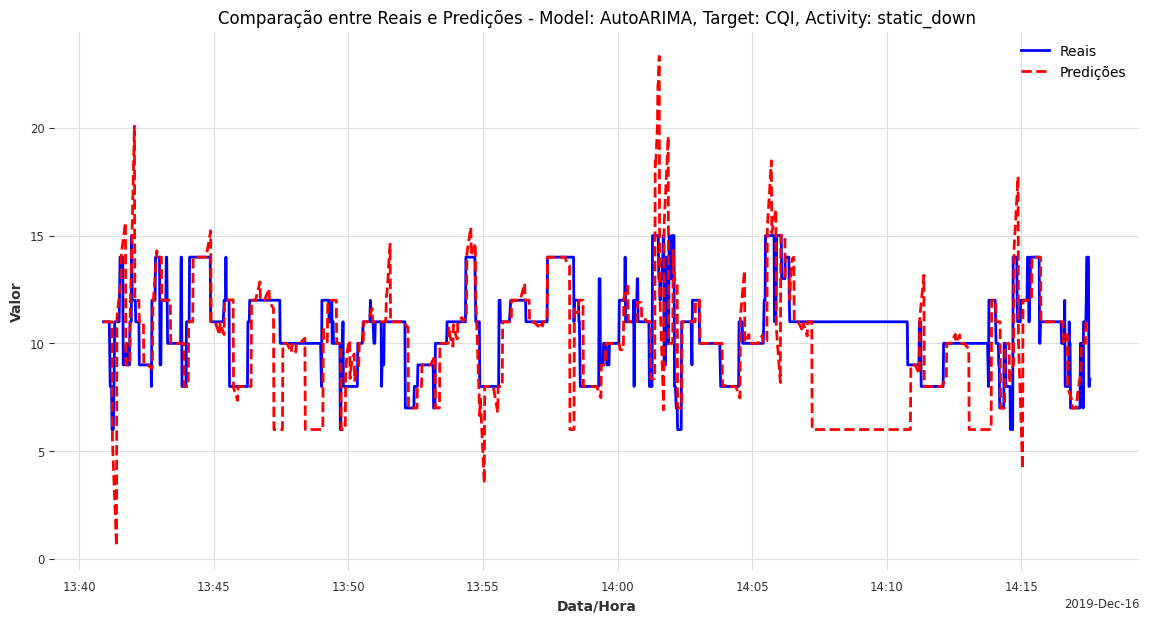

In [63]:
# Exemplo de uso
plot_actual_vs_preds(lowest_mae, model="AutoARIMA", target="CQI", activity="static_down")